/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - loss: 0.0030 - val_loss: 1.6833e-05
Epoch 2/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - loss: 1.7861e-05 - val_loss: 1.7360e-05
Epoch 3/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - loss: 1.4013e-05 - val_loss: 1.1886e-05
Epoch 4/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 143s 13ms/step - loss: 1.3403e-05 - val_loss: 1.2126e-05
Epoch 5/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - loss: 1.2875e-05 - val_loss: 1.2359e-05
Epoch 6/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 197s 13ms/step - loss: 1.2872e-05 - val_loss: 1.4311e-05
Epoch 7/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - loss: 1.2845e-05 - val_loss: 1.5599e-05
Epoch 8/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 199s 13ms/step - loss: 1.2785e-05 - val_loss: 1.3686e-05
Epoch 9/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 137s 13ms/step - loss: 1.2587e-05 - val_loss: 1.4904e-05
Epoch 10/20
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 140s 13ms/step - loss: 1.2542e-05 - val_loss: 1.16

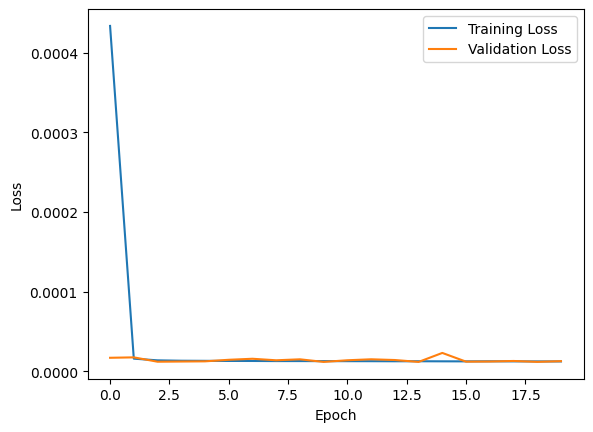

In [ ]:
# Paso 1: Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Paso 2: Carga y preprocesa el dataset

data = pd.read_csv('/content/jena_climate_2009_2016.csv')
temperature_data = data['T (degC)'].values

# Escalamiento de datos para mejorar el rendimiento del modelo
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data = scaler.fit_transform(temperature_data.reshape(-1, 1))

# Paso 3: Crea secuencias de datos para la serie temporal
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define el tamaño de la ventana de tiempo (por ejemplo, 24 horas)
seq_length = 24
x, y = create_sequences(temperature_data, seq_length)

# División en conjunto de entrenamiento y prueba
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Paso 4: Configuración y compilación del modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Paso 5: Entrenamiento del modelo (Aquí es donde colocas model.fit)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Paso 6: Evaluación y análisis (gráfica de la pérdida durante el entrenamiento)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [1]:
# Paso 4: Configuración y compilación del modelo LSTM con la métrica MAE
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Paso 5: Entrenamiento del modelo (con model.fit)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Paso 6: Evaluación del modelo y cálculo de MAE en el conjunto de prueba
mae = model.evaluate(x_test, y_test, verbose=0)[1]
print(f'MAE en el conjunto de prueba: {mae}')

# Paso 7: Análisis gráfico de la pérdida y MAE durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss / MAE')
plt.legend()
plt.show()

NameError: name 'Sequential' is not defined

Epoch 1/20
10514/10514 [==============================] - 91s 9ms/step - loss: 3.3119e-04 - mae: 0.0053 - val_loss: 4.0884e-05 - val_mae: 0.0053
Epoch 2/20
10514/10514 [==============================] - 90s 9ms/step - loss: 1.5354e-05 - mae: 0.0027 - val_loss: 2.0897e-05 - val_mae: 0.0036
Epoch 3/20
10514/10514 [==============================] - 94s 9ms/step - loss: 1.3563e-05 - mae: 0.0025 - val_loss: 1.2617e-05 - val_mae: 0.0023
Epoch 4/20
10514/10514 [==============================] - 94s 9ms/step - loss: 1.3098e-05 - mae: 0.0024 - val_loss: 1.1879e-05 - val_mae: 0.0022
Epoch 5/20
10514/10514 [==============================] - 86s 8ms/step - loss: 1.3067e-05 - mae: 0.0024 - val_loss: 1.3527e-05 - val_mae: 0.0026
Epoch 6/20
10514/10514 [==============================] - 88s 8ms/step - loss: 1.2969e-05 - mae: 0.0024 - val_loss: 1.2031e-05 - val_mae: 0.0022
Epoch 7/20
10514/10514 [==============================] - 84s 8ms/step - loss: 1.2855e-05 - mae: 0.0024 - val_loss: 1.1850e-05 - v

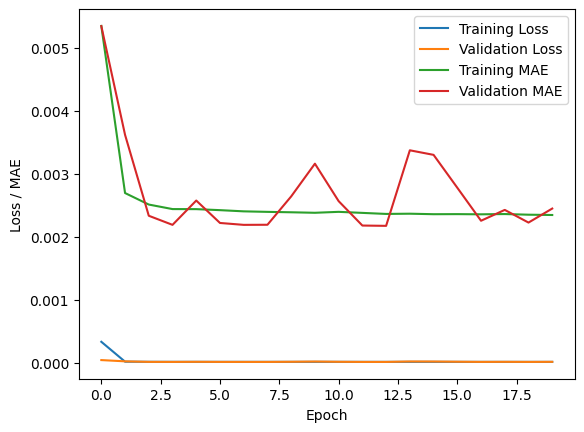

In [3]:
# Paso 1: Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Paso 2: Carga y preprocesa el dataset

data = pd.read_csv('/content/jena_climate_2009_2016.csv')
temperature_data = data['T (degC)'].values

# Escalamiento de datos para mejorar el rendimiento del modelo
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data = scaler.fit_transform(temperature_data.reshape(-1, 1))

# Paso 3: Crea secuencias de datos para la serie temporal
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define el tamaño de la ventana de tiempo (por ejemplo, 24 horas)
seq_length = 24
x, y = create_sequences(temperature_data, seq_length)

# División en conjunto de entrenamiento y prueba
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Paso 4: Configuración y compilación del modelo LSTM con la métrica MAE
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Paso 5: Entrenamiento del modelo (con model.fit)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Paso 6: Evaluación del modelo y cálculo de MAE en el conjunto de prueba
mae = model.evaluate(x_test, y_test, verbose=0)[1]
print(f'MAE en el conjunto de prueba: {mae}')

# Paso 7: Análisis gráfico de la pérdida y MAE durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss / MAE')
plt.legend()
plt.show()
